<a href="https://colab.research.google.com/github/Kei-Kobayash/ATR_faces_rating/blob/main/Face_photos_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#import data
df_original = pd.read_csv("photo_rating_merged_all_24pars.csv")
df_original.head()

,ExperimentName,Subject,Session,Clock.Information,DataFile.Basename,Display.RefreshRate,ExperimentVersion,Group,Hi.DEVICE,RandomSeed,...,Slide2.ACC,Slide2.CRESP,Slide2.DEVICE,Slide2.DurationError,Slide2.OnsetDelay,Slide2.OnsetTime,Slide2.OnsetToOnsetTime,arousal_RESP,Slide2.RT,Slide2.RTTime
0,kei_2021_rating,1,1,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",kei_2021_rating-1-1,144.272,1.0.0.225,1,Keyboard,1792557204,...,0,NaN,Keyboard,-999999,18,410167,0,5,5118,415285
1,kei_2021_rating,1,1,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",kei_2021_rating-1-1,144.272,1.0.0.225,1,Keyboard,1792557204,...,0,NaN,Keyboard,-999999,18,422389,0,6,2992,425381
2,kei_2021_rating,1,1,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",kei_2021_rating-1-1,144.272,1.0.0.225,1,Keyboard,1792557204,...,0,NaN,Keyboard,-999999,18,434084,0,5,1553,435637
3,kei_2021_rating,1,1,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",kei_2021_rating-1-1,144.272,1.0.0.225,1,Keyboard,1792557204,...,0,NaN,Keyboard,-999999,23,448396,0,5,745,449141
4,kei_2021_rating,1,1,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",kei_2021_rating-1-1,144.272,1.0.0.225,1,Keyboard,1792557204,...,0,NaN,Keyboard,-999999,18,455250,0,5,3395,458645


In [ ]:
df = df_original[["Subject", "face", "valence_RESP", "arousal_RESP"]]
df.head()

def determine_type(face):
  if "N" in face:
    return "neutral"
  elif "Sm" in face:
    return "smile"

df["expression"] = df["face"].apply(determine_type)
df.head()

<ipython-input-8-cddf8bc05c1a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["expression"] = df["face"].apply(determine_type)


,Subject,face,valence_RESP,arousal_RESP,expression
0,1,M09N,4,5,neutral
1,1,F16Sm,6,6,smile
2,1,F03N,4,5,neutral
3,1,M09Sm,7,5,smile
4,1,F10Sm,5,5,smile


In [ ]:
#data analyses all (based on expressions)

subjects = df["Subject"].nunique()

"""
average_arousal = df.groupby(["Subject", "expression"])["arousal_RESP"].mean().reset_index()
average_valence = df.groupby(["Subject", "expression"])["valence_RESP"].mean().reset_index()
"""

average_arousal = df.groupby(["Subject", "expression"]).agg("mean").reset_index()
average_valence = df.groupby(["Subject", "expression"]).agg("mean").reset_index()


df_neutral = average_arousal[average_arousal["expression"] == "neutral"]
df_smile = average_valence[average_arousal["expression"] == "smile"]

df_neutral = df_neutral[df_neutral['Subject'] != 10]
df_smile = df_smile[df_smile["Subject"] != 10]

<ipython-input-71-ca940978f7a6>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_arousal = df.groupby(["Subject", "expression"]).agg("mean").reset_index()
<ipython-input-71-ca940978f7a6>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_valence = df.groupby(["Subject", "expression"]).agg("mean").reset_index()


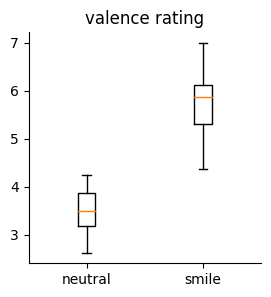

In [ ]:
plt.figure(figsize = (3, 3))
plt.boxplot([df_neutral["valence_RESP"], df_smile["valence_RESP"]], labels = ["neutral", "smile"])
plt.title("valence rating")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)



#plt.show()
plt.savefig("valence_rating.png", dpi = 500)

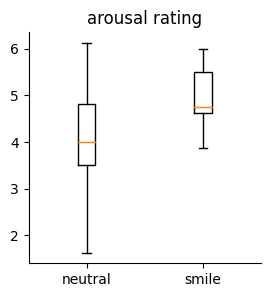

In [ ]:
plt.figure(figsize = (3, 3))
plt.boxplot([df_neutral["arousal_RESP"], df_smile["arousal_RESP"]], labels = ["neutral", "smile"])
plt.title("arousal rating")
ax2 = plt.gca()
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

#plt.show()
plt.savefig("arousal_rating.png", dpi = 500)

In [ ]:
df_neutral.to_csv("neutral_face_rating.csv")
df_smile.to_csv("smile_face_rating.csv")